# Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We can find gradient of function using numerical Methods:
1. Forward Difference
2. Backward Difference
3. Central Difference

In [2]:
def fd(f,x1,x2,epsilon):
    gradfx1 = (f(x1+epsilon,x2)-f(x1,x2))/epsilon
    gradfx2 = (f(x1,x2+epsilon)-f(x1,x2))/epsilon
    return np.array([gradfx1,gradfx2])

In [3]:
def bd(f,x1,x2,epsilon):
    gradfx1 = (f(x1,x2)-f(x1-epsilon,x2))/epsilon
    gradfx2 = (f(x1,x2)-f(x1,x2-epsilon))/epsilon
    return np.array([gradfx1,gradfx2])

In [4]:
def cd(f,x1,x2,epsilon):
    gradfx1 = (f(x1+0.5*epsilon,x2)-f(x1-0.5*epsilon,x2))/epsilon
    gradfx2 = (f(x1,x2+0.5*epsilon)-f(x1,x2-0.5*epsilon))/epsilon
    return np.array([gradfx1,gradfx2])

## Problem 1

The Given function is:
\begin{array}{rrrrr}
f(x_1,x_2) = 12.069x_1^2 + 21.504x_2^2-1.7321x_1-x_2 
\end{array}

Gradient of the function is:
$$ \nabla f=\begin{bmatrix} 
	\frac{\partial f}{\partial x_1} \\
		\\
	\frac{\partial f}{\partial x_2} \\
	\end{bmatrix} $$
$$ \nabla f=\begin{bmatrix}
	24.138x_1-1.7321 \\
		\\
	43.008x_2-1 \\
	\end{bmatrix} $$


At given point:
$$ x_0=\begin{bmatrix}
    5 \\
        \\
    6 \\
    \end{bmatrix} $$

Analytically the gradient of the function is:

$$ \nabla f(x_0)=\begin{bmatrix}
    118.9579 \\
    257.048 \\
    \end{bmatrix} $$

`Using Forward Difference:`

In [5]:
def f(x1,x2):
    return 12.069*x1**2 + 21.504*x2**2-1.7321*x1-x2 

In [6]:
fd(f,5,6,0.001)

array([118.969969, 257.069504])

`Using Backward Difference:`

In [7]:
bd(f,5,6,0.001)

array([118.945831, 257.026496])

`Using Central Difference:`

In [8]:
cd(f,5,6,0.001)

array([118.9579, 257.048 ])

Analytically gradient of function 1 is:

In [9]:
def gradf1(x1,x2):
    gradx1= 24.138*x1 - 1.7321
    gradx2 = 43.008*x2-1
    return np.array([gradx1,gradx2])

In [10]:
gradf1(5,6)

array([118.9579, 257.048 ])

### Calculating Error

Next, we ned to calculate errors of different $\epsilon$ s. For this, we are using the norm of the difference between the gradient of the analytical solution and the calculated error.

In [11]:
def err(epsilon):
    err_fd = np.linalg.norm(gradf1(5,6)-fd(f,5,6,epsilon))
    err_bd = np.linalg.norm(gradf1(5,6)-bd(f,5,6,epsilon))
    err_cd = np.linalg.norm(gradf1(5,6)-cd(f,5,6,epsilon))
    return np.array([err_fd,err_bd,err_cd])

We are using log scale to calculate $\epsilon$

In [12]:
epsilon = np.logspace(-10,-1,100)

In [13]:
abserr = np.zeros((100,3))
for i in range(epsilon.shape[0]):
    abserr[i] = err(epsilon[i]) 

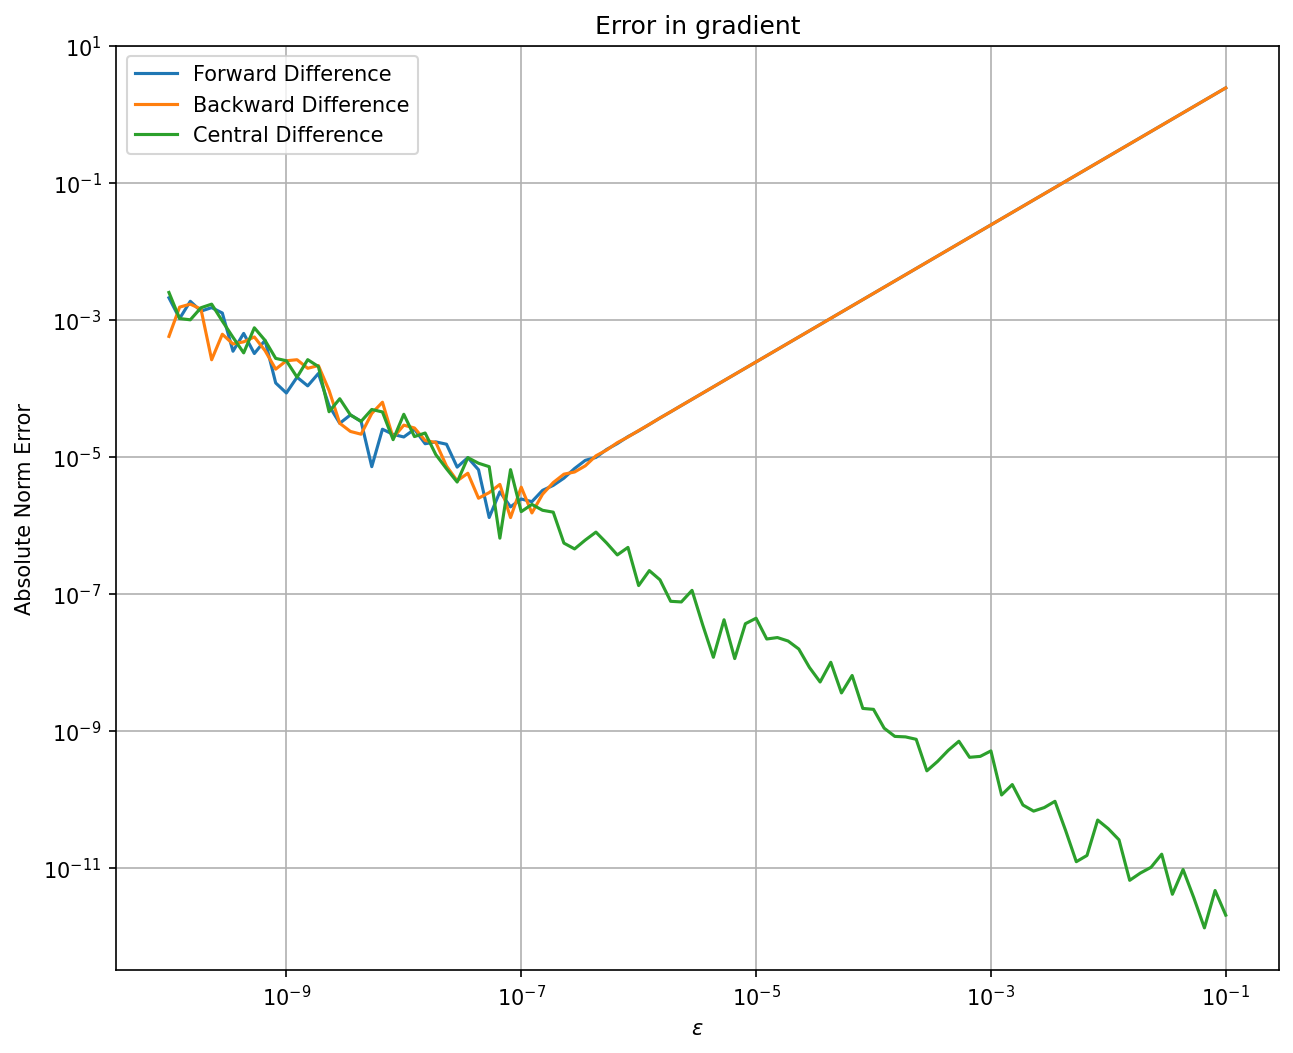

In [14]:
plt.figure(figsize=(10,8),dpi=150)
plt.loglog(epsilon,abserr[:,0],label='Forward Difference')
plt.loglog(epsilon,abserr[:,1],label='Backward Difference')
plt.loglog(epsilon,abserr[:,2],label='Central Difference')
plt.title('Error in gradient')
plt.xlabel("$\epsilon$")
plt.ylabel('Absolute Norm Error')
plt.legend()
plt.grid()
plt.savefig("Error Problem 1")

## Problem 2

\begin{array}{rrrrr}
f(x_1,x_2) = \frac{4x_2^2 -x_1x_2}{10000(x_2x_1^3+x_1^4)}
\end{array}


Analytically, the gradient is:
$$
\nabla f(x_1, x_2) = \begin{bmatrix} -\dfrac{3x_2\cdot\left(x_1^2-6x_2x_1+4x_2^2\right)}{10000x_1^4\cdot\left(x_1-x_2\right)^2} \\ \dfrac{4x_2^2-8x_1x_2+x_1^2}{10000x_1^3\cdot\left(x_2-x_1\right)^2} \end{bmatrix}
$$

Find the gradient of the function using numerical methods at the point:
$$ x_0=\begin{bmatrix}
    0.5 \\
        \\
    1.5 \\
    \end{bmatrix} $$

The Function is:

In [15]:
def f2(x1,x2):
    num = 4*x2*x2 -x1*x2
    den = 10000*(x2*x1**3-x1**4)
    return num/den

In [16]:
f2(5,6)

9.12e-05

In [17]:
fd(f2,0.5,1.5,0.001)

array([-0.03406902,  0.0026006 ])

In [18]:
bd(f2,0.5,1.5,0.001)

array([-0.03433183,  0.0025994 ])

In [19]:
cd(f2,0.5,1.5,0.00001)

array([-0.0342,  0.0026])

In [20]:
def gradf2(x1,x2):
    dfx1n = -(3 * x2 * (x1**2 - 6 * x2 * x1 + 4 * x2**2))
    dfx1d = 10000 * x1**4 * (x1 - x2) ** 2
    dfx1 = dfx1n / (dfx1d)

    dfx2n = 4 * x2**2 - 8 * x1 * x2 + x1**2
    dfx2d = 10000 * x1**3 * (x2 - x1) ** 2
    dfx2 = dfx2n / (dfx2d)

    return np.array([dfx1, dfx2])

In [21]:
gradf2(0.5,1.5)

array([-0.0342,  0.0026])

In [22]:
np.linalg.norm(gradf2(0.5,1.5)-bd(f2,0.5,1.5,0.001))

0.00013182802623465544

In [23]:
def err(epsilon):
    err_fd = np.linalg.norm(gradf2(0.5,1.5)-fd(f2,0.5,1.5,epsilon))
    err_bd = np.linalg.norm(gradf2(0.5,1.5)-bd(f2,0.5,1.5,epsilon))
    err_cd = np.linalg.norm(gradf2(0.5,1.5)-cd(f2,0.5,1.5,epsilon))
    return np.array([err_fd,err_bd,err_cd])

In [24]:
err(0.001)

array([1.30977223e-04, 1.31828026e-04, 1.06350322e-07])

In [25]:
epsilon = np.logspace(-10,-1,100)

In [26]:
abserr = np.zeros((100,3))
for i in range(epsilon.shape[0]):
    abserr[i] = err(epsilon[i])    

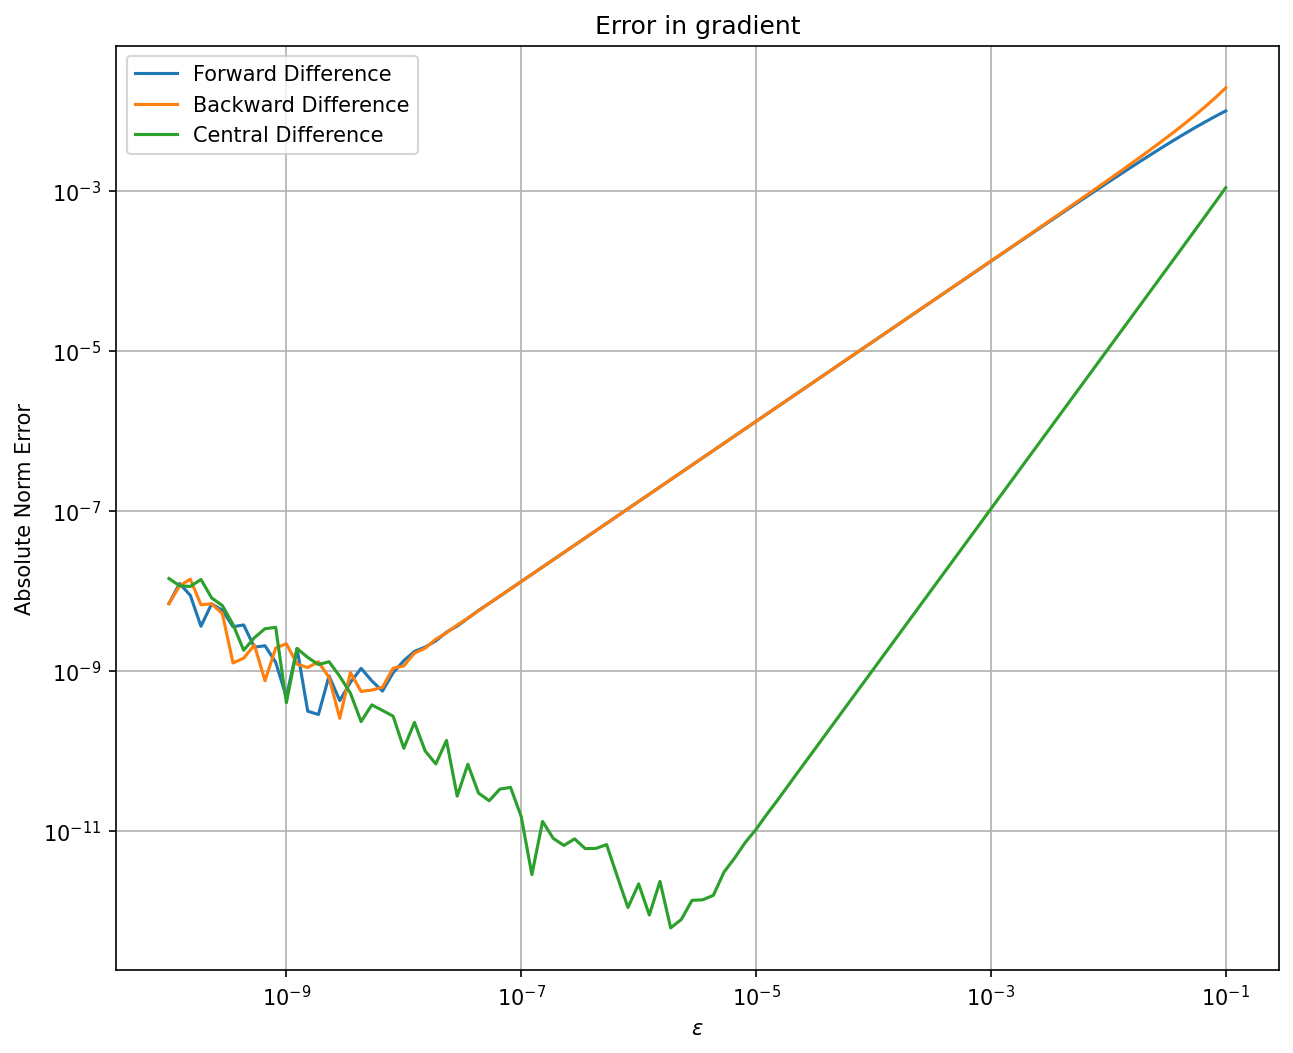

In [28]:
plt.figure(figsize=(10,8),dpi=150)
plt.loglog(epsilon,abserr[:,0],label='Forward Difference')
plt.loglog(epsilon,abserr[:,1],label='Backward Difference')
plt.loglog(epsilon,abserr[:,2],label='Central Difference')
plt.title('Error in gradient')
plt.xlabel("$\epsilon$")
plt.ylabel('Absolute Norm Error')
plt.legend()
plt.grid()
plt.savefig("Error Problem 2")